<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Исследование-задачи" data-toc-modified-id="Исследование-задачи-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследование задачи</a></span></li><li><span><a href="#Борьба-с-дисбалансом" data-toc-modified-id="Борьба-с-дисбалансом-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Борьба с дисбалансом</a></span></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование модели</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Отток клиентов

Из «Бета-Банка» стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.

Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. Вам предоставлены исторические данные о поведении клиентов и расторжении договоров с банком. 

Постройте модель с предельно большим значением *F1*-меры. Чтобы сдать проект успешно, нужно довести метрику до 0.59. Проверьте *F1*-меру на тестовой выборке самостоятельно.

Дополнительно измеряйте *AUC-ROC*, сравнивайте её значение с *F1*-мерой.

Источник данных: [https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling](https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling)

## Подготовка данных

На вход я получил датафрейм с данными клиентов банка. Необходимо проверить их на необходимость предобработки, выделить целевой признак и признаки для модели обучения.  После проверить данные на сбалансированность, протестировать модель на адекватность. Основная цель- построить модель, которая будет прогнозировать уход клиента из банка

Для начала посмотрю в общем на данные, размер датасета

In [1]:
!pip install scikit-learn --upgrade

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.dummy import DummyClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.utils import shuffle
from sklearn.preprocessing import OneHotEncoder
import warnings
#констатнта
RANDOM_STATE = 11111

In [3]:
data = pd.read_csv('/datasets/Churn.csv')

In [4]:
data.shape

(10000, 14)

In [5]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


Для упрощения прогнозирования можно Gender разбить на классы (например с помощью dummy) И стандартизировать остальные категориальные параметры. Так же сбалансировать все численные данные. Столбцы RowNumber, CustomerId, Surname можно исключить из данных для обучения модели. Посмотрим на Geography - если категорий будет мало- можно будет так же прогнать через ohe

In [6]:
data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,9091.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,4.997690,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.894723,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,2.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [7]:
data['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

3 страны- спокойно можно использовать ohe, с удалением 1 стоблца для избегания дамми ловушки. А пока посмотрю общее инфо о датафрейме

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


В столбце с количеством лет, которым является  человек клиентом банка обнаружилось 909 пропусков

In [9]:
data[data['Tenure'].isna()]

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
30,31,15589475,Azikiwe,591,Spain,Female,39,NaN,0.00,3,1,0,140469.38,1
48,49,15766205,Yin,550,Germany,Male,38,NaN,103391.38,1,0,1,90878.13,0
51,52,15768193,Trevisani,585,Germany,Male,36,NaN,146050.97,2,0,0,86424.57,0
53,54,15702298,Parkhill,655,Germany,Male,41,NaN,125561.97,1,0,0,164040.94,1
60,61,15651280,Hunter,742,Germany,Male,35,NaN,136857.00,1,0,0,84509.57,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9944,9945,15703923,Cameron,744,Germany,Male,41,NaN,190409.34,2,1,1,138361.48,0
9956,9957,15707861,Nucci,520,France,Female,46,NaN,85216.61,1,1,0,117369.52,1
9964,9965,15642785,Douglas,479,France,Male,34,NaN,117593.48,2,0,0,113308.29,0
9985,9986,15586914,Nepean,659,France,Male,36,NaN,123841.49,2,1,0,96833.00,0


Остальные строки заполнены, много нужной информации. Считаю правильным заполнить пропуски медианой

Разделим данные на целевой признак и признаки для обучения

In [10]:
features = data.drop(['RowNumber', 'CustomerId', 'Surname', 'Exited'], axis=1)
target = data['Exited']

In [11]:
features_train, features_valid, target_train, target_valid = train_test_split(
    features, target, test_size=0.2, random_state=RANDOM_STATE, stratify=target)

In [12]:
features_train, features_test, target_train, target_test = train_test_split(
    features_train, target_train, test_size=0.2, random_state=RANDOM_STATE, stratify=target_train)

In [13]:
features_train.shape

(6400, 10)

In [14]:
features_valid.shape

(2000, 10)

In [15]:
features_test.shape

(1600, 10)

In [16]:
features_train

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
9156,504,Spain,Female,46,2.0,163764.84,1,1,1,165122.55
8219,572,France,Female,39,2.0,0.00,2,1,1,555.28
6870,850,Germany,Female,36,0.0,136980.23,2,1,1,99019.65
6941,501,Germany,Male,25,6.0,104013.79,1,1,0,114774.35
744,650,France,Male,60,8.0,0.00,2,1,1,102925.76
...,...,...,...,...,...,...,...,...,...,...
6485,640,Germany,Male,26,5.0,90402.77,1,1,1,3298.65
9327,593,Spain,Female,40,2.0,0.00,1,1,1,5194.95
9125,749,Spain,Male,34,2.0,0.00,1,0,0,174189.04
9096,569,France,Male,37,9.0,178755.84,1,1,0,199929.17


In [17]:
features_train['Tenure'].describe()

count    5801.000000
mean        5.016376
std         2.880536
min         0.000000
25%         3.000000
50%         5.000000
75%         8.000000
max        10.000000
Name: Tenure, dtype: float64

In [18]:
features_valid['Tenure'].describe()

count    1818.000000
mean        5.008801
std         2.914660
min         0.000000
25%         3.000000
50%         5.000000
75%         7.750000
max        10.000000
Name: Tenure, dtype: float64

In [19]:
warnings.simplefilter(action='ignore')
features_train['Tenure'] = features_train['Tenure'].fillna(features_train['Tenure'].median())
features_valid['Tenure'] = features_valid['Tenure'].fillna(features_valid['Tenure'].median())


In [20]:
features_train['Tenure'].describe()

count    6400.000000
mean        5.014844
std         2.742407
min         0.000000
25%         3.000000
50%         5.000000
75%         7.000000
max        10.000000
Name: Tenure, dtype: float64

In [21]:
features_valid['Tenure'].describe()

count    2000.000000
mean        5.008000
std         2.778812
min         0.000000
25%         3.000000
50%         5.000000
75%         7.000000
max        10.000000
Name: Tenure, dtype: float64

In [22]:
features_train

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
9156,504,Spain,Female,46,2.0,163764.84,1,1,1,165122.55
8219,572,France,Female,39,2.0,0.00,2,1,1,555.28
6870,850,Germany,Female,36,0.0,136980.23,2,1,1,99019.65
6941,501,Germany,Male,25,6.0,104013.79,1,1,0,114774.35
744,650,France,Male,60,8.0,0.00,2,1,1,102925.76
...,...,...,...,...,...,...,...,...,...,...
6485,640,Germany,Male,26,5.0,90402.77,1,1,1,3298.65
9327,593,Spain,Female,40,2.0,0.00,1,1,1,5194.95
9125,749,Spain,Male,34,2.0,0.00,1,0,0,174189.04
9096,569,France,Male,37,9.0,178755.84,1,1,0,199929.17


## Исследование задачи

Посмотрим на целевой признак - сбалансирован он или нет

In [23]:
data['Exited'].value_counts(normalize=True)

0    0.7963
1    0.2037
Name: Exited, dtype: float64

Наблюдается дисбаланс- ушедших клиентов из банка сильно меньше. Для бизнеса это хорошо, но для обучения модели нет

<AxesSubplot:ylabel='Exited'>

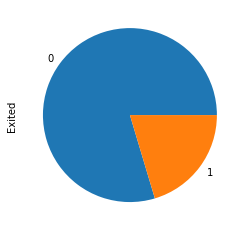

In [24]:
data['Exited'].value_counts(normalize=True).plot(kind='pie')

Применю ohe, чтобы модели смогли обучиться

In [25]:
categorical_features = features_train.select_dtypes(include='object').columns.tolist()

encoder_ohe = OneHotEncoder(handle_unknown='ignore', sparse=False)

encoder_ohe.fit(features_train[categorical_features])

features_train[
      encoder_ohe.get_feature_names_out()
  ] = encoder_ohe.transform(features_train[categorical_features])

features_train = features_train.drop(categorical_features, axis=1)

features_valid[
      encoder_ohe.get_feature_names_out()
  ] = encoder_ohe.transform(features_valid[categorical_features])

features_valid = features_valid.drop(categorical_features, axis=1)

features_test[
      encoder_ohe.get_feature_names_out()
  ] = encoder_ohe.transform(features_test[categorical_features])

features_test = features_test.drop(categorical_features, axis=1)

In [26]:
scaler = StandardScaler()
numeric = ['CreditScore', 'Age', 'Tenure', 'Balance', 'EstimatedSalary']
scaler.fit(features_train[numeric])
features_train[numeric] = scaler.transform(features_train[numeric])
features_valid[numeric] = scaler.transform(features_valid[numeric])
features_test[numeric] = scaler.transform(features_test[numeric])

In [27]:
features_train

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
9156,-1.510064,0.679313,-1.099428,1.403560,1,1,1,1.137976,0.0,0.0,1.0,1.0,0.0
8219,-0.800619,0.007246,-1.099428,-1.223471,2,1,1,-1.733395,1.0,0.0,0.0,1.0,0.0
6870,2.099761,-0.280783,-1.828771,0.973895,2,1,1,-0.015388,0.0,1.0,0.0,1.0,0.0
6941,-1.541363,-1.336890,0.359259,0.445064,1,1,0,0.259500,0.0,1.0,0.0,0.0,1.0
744,0.013157,2.023449,1.088602,-1.223471,2,1,1,0.052766,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6485,-0.091173,-1.240880,-0.005413,0.226723,1,1,1,-1.685529,0.0,1.0,0.0,0.0,1.0
9327,-0.581525,0.103255,-1.099428,-1.223471,1,1,1,-1.652442,0.0,0.0,1.0,1.0,0.0
9125,1.046026,-0.472803,-1.099428,-1.223471,1,0,0,1.296168,0.0,0.0,1.0,0.0,1.0
9096,-0.831918,-0.184774,1.453273,1.644038,1,1,0,1.745282,1.0,0.0,0.0,0.0,1.0


In [28]:
features_valid


,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
9145,0.660004,0.583304,0.359259,0.589131,1,0,0,1.718578,0.0,0.0,1.0,0.0,1.0
1162,-0.351999,-0.856841,1.453273,-1.223471,1,1,0,-0.219038,1.0,0.0,0.0,1.0,0.0
8657,-1.217939,0.391284,-0.005413,-1.223471,2,0,0,1.582051,1.0,0.0,0.0,0.0,1.0
1786,0.649571,-0.184774,-0.005413,-1.223471,2,1,0,-0.277820,0.0,0.0,1.0,0.0,1.0
7971,-0.164204,0.295275,-0.005413,-1.223471,1,0,1,-0.357569,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7490,0.054889,-0.376793,-1.099428,0.234151,1,1,1,-0.229217,1.0,0.0,0.0,1.0,0.0
4015,1.713739,-0.664822,-1.464100,0.747865,1,1,1,-1.281127,1.0,0.0,0.0,0.0,1.0
2584,1.035593,0.103255,-1.828771,-1.223471,1,0,0,-0.688932,1.0,0.0,0.0,0.0,1.0
8747,-0.727587,-0.952851,1.817945,-0.049322,2,1,1,0.511358,1.0,0.0,0.0,1.0,0.0


In [29]:
features_test

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
9589,-0.174637,3.079555,-0.734756,0.109844,1,1,1,-1.261558,1.0,0.0,0.0,0.0,1.0
3376,-0.049441,0.103255,-0.370085,0.016056,2,1,1,0.277397,0.0,1.0,0.0,1.0,0.0
8875,0.555674,-0.280783,1.453273,0.229253,2,1,0,1.297561,0.0,1.0,0.0,0.0,1.0
2739,-0.247669,0.583304,0.723930,0.983122,1,0,0,0.431072,1.0,0.0,0.0,0.0,1.0
3475,1.254686,-0.760832,-0.370085,-0.240175,2,1,1,-1.618889,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6479,-0.007709,0.967342,NaN,-1.223471,1,1,0,0.873183,0.0,0.0,1.0,0.0,1.0
9060,0.378313,-0.568812,NaN,-1.223471,3,0,1,-0.517865,1.0,0.0,0.0,1.0,0.0
6895,-0.404164,0.967342,0.359259,0.603370,1,1,0,1.673477,0.0,1.0,0.0,0.0,1.0
2574,0.169652,1.159362,1.453273,0.550884,2,0,1,-1.723668,0.0,1.0,0.0,1.0,0.0


Начнем строить модель предсказаний с Dummy - для того, чтобы была отправная точка для предварительной оценки предсказаний модели

Дамми показал результат f1- 0.26 и roc_auc 0.5

Логистическая регрессия показала около нулевой результат f1 без балансировки классов и 0.45 с балансировкой. Считаю правильным эту модель в исследовании больше не использовать

Проверяю дерево решений без балансировки и масштабирования: перебираю гиперпараметр количества ветвей

Результаты с 7 ветвями показывают неплохой результат (0.584), но недостаточный по условию задачи. Нужно будет дальше применить балансировку и масштабирование- возможно метрики вырастут. А пока проверим лес решений

Итог: лучшие параметры при 13 деревьях и 30 ветвях - f1 0.574. Но пока не прохожу по минимальному заданному порогу. Попробую сбалансировать классы и изменить размер сэмплов

Простой подбор гиперпараметов не выявил подходящей модели. Необходимо провести работу по борьбе с дисбалансом моделей Дерева решений и Леса решений: сбалансировать и масштабировать

## Борьба с дисбалансом

Для начала подготовлю функции для увеличения и уменьшения выборок

In [30]:
def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
    
    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=RANDOM_STATE)
    
    return features_upsampled, target_upsampled

In [31]:
def downsample(features, target, fraction):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_downsampled = pd.concat(
        [features_zeros.sample(frac=fraction, random_state=RANDOM_STATE)] + [features_ones])
    target_downsampled = pd.concat(
        [target_zeros.sample(frac=fraction, random_state=RANDOM_STATE)] + [target_ones])
    
    features_downsampled, target_downsampled = shuffle(
        features_downsampled, target_downsampled, random_state=RANDOM_STATE)
    
    return features_downsampled, target_downsampled

Посмотрю на дерево решений с баланировкой

Лучший показатель при 6 ветвях: f1:0.584, roc_auc:0.841

При увеличении выборки (в 4 раза), 6 ветвей дали лучший резульатат f1:0.58412, roc_auc:0.84204

А при уменьшении: 7 ветвей, но и f1 и roc auc ниже, чем при увеличении

Так как граница для прохода модели установлена на значении f1  в 0.59- Дерево решений на данном этапе мы отсекаем.

Проверим лес решений с балансировкой:

С балансировкой лес показал лучший результат при 12 деревьях, на 13 пошло переобучение

И количество ветвей- 20

In [32]:
forest = RandomForestClassifier(max_depth=12, n_estimators=20,random_state=RANDOM_STATE, class_weight='balanced')
forest.fit(features_train, target_train)
forest_predict = forest.predict(features_valid)
forest_score_f1 = f1_score(target_valid, forest_predict).round(5)
probabilities_valid = forest.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
forest_roc_auc = roc_auc_score(target_valid, probabilities_one_valid).round(5)
print(f'f1-score: {forest_score_f1}')
print(f'roc-auc: {forest_roc_auc}')

f1-score: 0.58167
roc-auc: 0.83809


Лучше всего показал себя лес решений с 12 деревьями и 20 ветвями: f1-score: 0.60417
roc-auc: 0.84689

Попробуем увеличить и уменьшить выборки

In [33]:
features_upsampled, target_upsampled = upsample(features_train, target_train, 4)

forest_up = RandomForestClassifier(max_depth=12, n_estimators=20,random_state=RANDOM_STATE)
forest_up.fit(features_upsampled, target_upsampled)
forest_up_predict = forest_up.predict(features_valid)
forest_up_score_f1 = f1_score(target_valid, forest_up_predict).round(5)
probabilities_valid = forest_up.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
forest_up_roc_auc = roc_auc_score(target_valid, probabilities_one_valid).round(5)
print(f'f1-score: {forest_up_score_f1}')
print(f'roc-auc: {forest_up_roc_auc}')

f1-score: 0.60606
roc-auc: 0.84209


При увеличении в 4 раза метрики показывают лучший результат f1-score: 0.61302
roc-auc: 0.84689


А при уменьшении лучший результат получился при 0.25 - f1-score: 0.58228
roc-auc: 0.84543


Проверив 3 модели машинного обучения Линейная регрессия не показала значимых результатов по метрикам.
Дерево решений сначала показало довольно неплохой результат без учета балансировки и масштабирования (но недостаточный по условиям задачи). Я попробовал повысить значения метрик добавив балансировку и попробовал увеличить и уменьшить сэмплы, но так же метрика f1 не достигла порогового значения в 0.59. Перебрав гиперпараметры случайного леса я подобрал параметры с 13 деревьями и 30 ветвями- но как оказалось эта модель была уже переобученной и при балансировке количество деревьев и ветвей немного снизилось- 12 и 20 соответсвенно. Метрика f1 уже стала значимой. Я решил дополнительно протестировать и балансировку и масштабирование и еще немного улучшил показатель метрики. Остался последний шаг- тест модели

## Тестирование модели

Тест леса с балансировкой:

f1-score: 0.62667
roc-auc: 0.84689


Тест леса с увеличением сэмпла:

In [34]:
#features_test = pd.get_dummies(features_test, drop_first=True)
features_test['Tenure'] = features_test['Tenure'].fillna(5)

forest_up_predict = forest_up.predict(features_test)
test_f1 = f1_score(target_test, forest_up_predict).round(5)
probabilities_valid = forest_up.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
test_roc_auc = roc_auc_score(target_valid, probabilities_one_valid).round(5)
print(f'f1-score: {test_f1}')
print(f'roc-auc: {test_roc_auc}')

f1-score: 0.63372
roc-auc: 0.84209


f1-score: 0.64905
roc-auc: 0.84698


Так как по условию задачи цель f1-мера не ниже, чем 0.59 лес решений показал лучший результат (При 12 деревьях, 20 ветвях, и увеличению сэмпла в 4 раза для балансировки). Лучшая метрика была получена при увеличиении сэмпла f1-score: f1-score: 0.64905 roc-auc: 0.84698. 
В целом без увеличения сэмпла модель так же прошла бы бейзлайн

## Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке исполнения
- [x]  Выполнен шаг 1: данные подготовлены
- [x]  Выполнен шаг 2: задача исследована
    - [x]  Исследован баланс классов
    - [x]  Изучены модели без учёта дисбаланса
    - [x]  Написаны выводы по результатам исследования
- [x]  Выполнен шаг 3: учтён дисбаланс
    - [x]  Применено несколько способов борьбы с дисбалансом
    - [x]  Написаны выводы по результатам исследования
- [x]  Выполнен шаг 4: проведено тестирование
- [x]  Удалось достичь *F1*-меры не менее 0.59
- [x]  Исследована метрика *AUC-ROC*

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Исследование-задачи" data-toc-modified-id="Исследование-задачи-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследование задачи</a></span></li><li><span><a href="#Борьба-с-дисбалансом" data-toc-modified-id="Борьба-с-дисбалансом-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Борьба с дисбалансом</a></span></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование модели</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>